Chapter 11 : Statistics

In [2]:
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1000)

In [3]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generates a Monte Carlo paths for geometric Brownian motion
    
    Parameters
    ==========
    S0 : float
        initial stock/index value
    r : float
        constant short rate
    sigma : float
        constant volatility
    T : float
        final time horizon
    M : int
        number of steps/intervals
    I : int
        number of paths to be simulated
        
    Returns
    =======
    paths : ndarray, shape (M + 1, I)
        simulated paths given the parameters
    '''
    
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
                                         + sigma * np.sqrt(dt) * rand)
        
    return paths

In [6]:
# possible parameterization
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000

paths = gen_paths(S0, r, sigma, T, M , I)

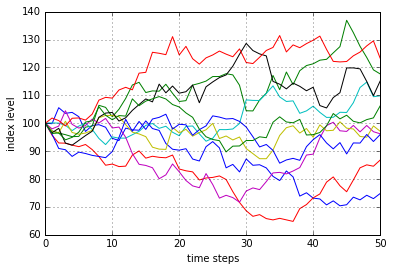

In [7]:
plt.plot(paths[:, :10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [8]:
log_returns = np.log(paths[1:] / paths[0:-1])

In [9]:
paths[:, 0].round(4)

array([ 100.    ,   99.8259,  105.5592,  103.5351,  103.8765,  102.3455,
         97.037 ,   99.1677,   99.4746,   98.5531,   94.5731,   93.7886,
         98.2344,   97.6286,   97.486 ,  100.8205,   98.0797,   97.4243,
         92.7311,   90.6651,   90.3353,   90.8615,   87.1551,   86.4598,
         91.5802,   93.4092,   91.1497,   84.0041,   85.2314,   82.537 ,
         87.1883,   84.9163,   85.1076,   83.972 ,   80.9482,   79.4321,
         82.8784,   80.7593,   73.8754,   75.067 ,   73.1602,   72.8452,
         70.7244,   72.1584,   70.3929,   70.7764,   73.492 ,   72.5211,
         74.1716,   72.9681,   74.7846])

In [10]:
log_returns[:, 0].round(4)

array([-0.0017,  0.0558, -0.0194,  0.0033, -0.0148, -0.0533,  0.0217,
        0.0031, -0.0093, -0.0412, -0.0083,  0.0463, -0.0062, -0.0015,
        0.0336, -0.0276, -0.0067, -0.0494, -0.0225, -0.0036,  0.0058,
       -0.0416, -0.008 ,  0.0575,  0.0198, -0.0245, -0.0816,  0.0145,
       -0.0321,  0.0548, -0.0264,  0.0023, -0.0134, -0.0367, -0.0189,
        0.0425, -0.0259, -0.0891,  0.016 , -0.0257, -0.0043, -0.0295,
        0.0201, -0.0248,  0.0054,  0.0377, -0.0133,  0.0225, -0.0164,
        0.0246])

In [16]:
def print_statistics(array):
    ''' Prints selected statistics 
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    
    sta = scs.describe(array)
    print("%14s %15s" % ('statistics', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))

In [17]:
print_statistics(log_returns.flatten())

    statistics           value
------------------------------
          size  12500000.00000
           min        -0.14581
           max         0.14723
          mean         0.00060
           std         0.02828
          skew         0.00043
      kurtosis         0.00001


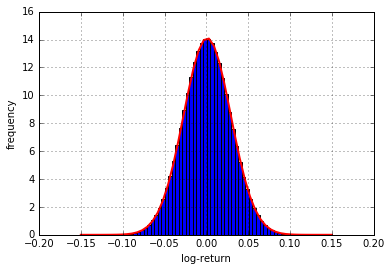

In [21]:
# is it a normal distribution?
plt.hist(log_returns.flatten(), bins=70, normed=True, label='frequency')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)), 'r', lw=2.0, label='pdf')

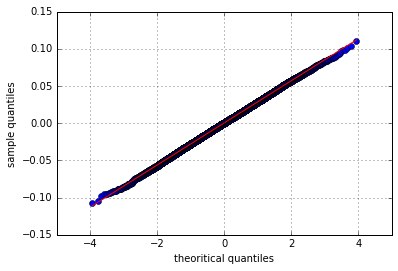

In [22]:
# qq plot
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoritical quantiles')
plt.ylabel('sample quantiles')

In [23]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print("Skew of data set %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])

In [24]:
normality_tests(log_returns.flatten())

Skew of data set          0.000
Skew test p-value          0.534
Kurt of data set          0.000
Kurt test p-value          0.993
Norm test p-value          0.824


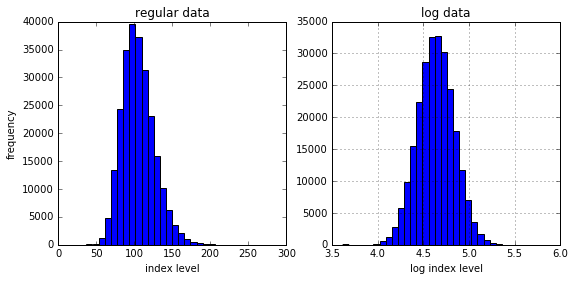

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.hist(paths[-1], bins=30)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

In [ ]:
# real-world data